In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
subspecies = pd.read_csv("Data/mgSs.coverage.stats.csv").rename(columns={"Unnamed: 0" : "subspecies"})
subspecies = subspecies['subspecies']
taxaKey = pd.read_csv("/Users/amaros/Desktop/mgss2/VIRGO2_taxaKey_all_gardnerella.csv")

def lighter_colors(base_color, num_colors):
    # Convert the base color to its RGB components
    r = int(base_color[1:3], 16)
    g = int(base_color[3:5], 16)
    b = int(base_color[5:7], 16)

    # Calculate the step values for degrading
    r_step = (255 - r) / num_colors
    g_step = (255 - g) / num_colors
    b_step = (255 - b) / num_colors

    # Generate the progressively lighter colors
    lighter_colors = []
    for i in range(num_colors):
        new_r = int(r + i * r_step)
        new_g = int(g + i * g_step)
        new_b = int(b + i * b_step)
        lighter_colors.append(f'#{new_r:02X}{new_g:02X}{new_b:02X}')

    return lighter_colors

species = subspecies.apply(lambda x : x.split(".")[0])
couleur = []
for i,j in zip(list(species.value_counts().sort_index().index), species.value_counts().sort_index()) :
    if i in taxaKey['Taxa'].values:
        a = taxaKey[taxaKey['Taxa'] == i]['Color'].values[0]
        couleur.append(lighter_colors(a,j))
    else :
        couleur.append(['#8c8c8c']*j)

# Original list with single elements and sublists
original_list = couleur
# Create a new list with only the single elements
new_list = [item for sublist in original_list for item in (sublist if isinstance(sublist, list) else [sublist])]

# subspecies_with_colors = pd.DataFrame({"Subspecies" : subspecies, "Color" : new_list})
# subspecies_with_colors.to_csv("Data/subspecies_with_colors.csv", index=False)
# subspecies_with_colors.head()

,Subspecies,Color
0,Actinotignum_sanguinis.1,#8c8c8c
1,Actinotignum_sanguinis.2,#8c8c8c
2,Aerococcus_christensenii.1,#616161
3,Aerococcus_christensenii.2,#7B7B7B
4,Aerococcus_christensenii.3,#959595


In [9]:
# Variation of colors between 2 kind of blues for Gardnerella : this generate 58 variation of blues

def interpolate_color(color1, color2, num_steps):
    # Convert hex colors to RGB tuples
    color1 = tuple(int(color1[i:i+2], 16) for i in (1, 3, 5))
    color2 = tuple(int(color2[i:i+2], 16) for i in (1, 3, 5))

    color_variations = []

    for step in range(num_steps):
        r = int(color1[0] + (color2[0] - color1[0]) * step / (num_steps - 1))
        g = int(color1[1] + (color2[1] - color1[1]) * step / (num_steps - 1))
        b = int(color1[2] + (color2[2] - color1[2]) * step / (num_steps - 1))

        # Convert RGB to hex
        hex_color = "#{:02X}{:02X}{:02X}".format(r, g, b)

        color_variations.append(hex_color)

    return color_variations

# Example usage:
color1 = "#221886"  # Blue
color2 = "#9A98BF"  # Cyan (light blue)
num_steps = 58  # Number of variations

variations = interpolate_color(color1, color2, num_steps)
print(variations)


['#221886', '#241A87', '#261C88', '#281E89', '#2A208A', '#2C238B', '#2E258C', '#30278D', '#32298E', '#342C8F', '#372E90', '#393091', '#3B3292', '#3D3593', '#3F3794', '#413995', '#433B96', '#453E97', '#474098', '#4A4299', '#4C449A', '#4E479B', '#50499C', '#524B9D', '#544D9E', '#56509F', '#5852A0', '#5A54A1', '#5C56A2', '#5F59A3', '#615BA4', '#635DA5', '#655FA6', '#6762A7', '#6964A8', '#6B66A9', '#6D68AA', '#6F6BAB', '#726DAC', '#746FAD', '#7671AE', '#7874AF', '#7A76B0', '#7C78B1', '#7E7AB2', '#807DB3', '#827FB4', '#8481B5', '#8783B6', '#8986B7', '#8B88B8', '#8D8AB9', '#8F8CBA', '#918FBB', '#9391BC', '#9593BD', '#9795BE', '#9A98BF']


In [40]:
mgcsts_samples = pd.read_csv("Data/mgCSTs.samples.df.csv")
mgCSTs_sort = pd.read_csv("Data/mgCSTs.sort.df.csv")
subspecies_with_colors = pd.read_csv("/Users/amaros/Desktop/mgss2/streamlit_app/Data/subspecies_with_colors.csv")
data = mgcsts_samples
data2 = mgCSTs_sort
# deepsplit = 4
# mincluster = 30

# data = mgcsts_samples[(mgcsts_samples['deepSplit'] == deepsplit) & (mgcsts_samples['minClusterSize'] == mincluster)]
# data = data.reset_index(drop = True)

# data2 = mgCSTs_sort[(mgCSTs_sort['deepSplit'] == deepsplit) & (mgCSTs_sort['minClusterSize'] == mincluster)]
# data2 = data2.reset_index(drop = True)


# count_sample = []
# for element in data2['dtc'].values :
#     count_sample.append(data.groupby(['dtc']).count()['sampleID'][element])
# data2['count_sample'] = count_sample

color_sort = []
for element in data2['domTaxa'].values :
    a = subspecies_with_colors[subspecies_with_colors['Subspecies'].apply(lambda x : x.replace(".", "_")) == element]['Color'].values
    if a.size > 0 :
        color_sort.append(a[0])
    else :
        color_sort.append("#8c8c8c")
data2['color_mgCST'] = color_sort

data2.to_csv("/Users/amaros/Desktop/mgss2/streamlit_app/Data/mgCST_sort_color.csv", index=False)

color_samples = []
for element in data['domTaxa'].values :
    a = subspecies_with_colors[subspecies_with_colors['Subspecies'].apply(lambda x : x.replace(".", "_")) == element]['Color'].values
    if a.size > 0 :
        color_samples.append(a[0])
    else :
        color_samples.append("#8c8c8c")
data['color_domTaxa'] = color_samples

data.to_csv("/Users/amaros/Desktop/mgss2/streamlit_app/Data/mgCST_samples_color.csv", index=False)


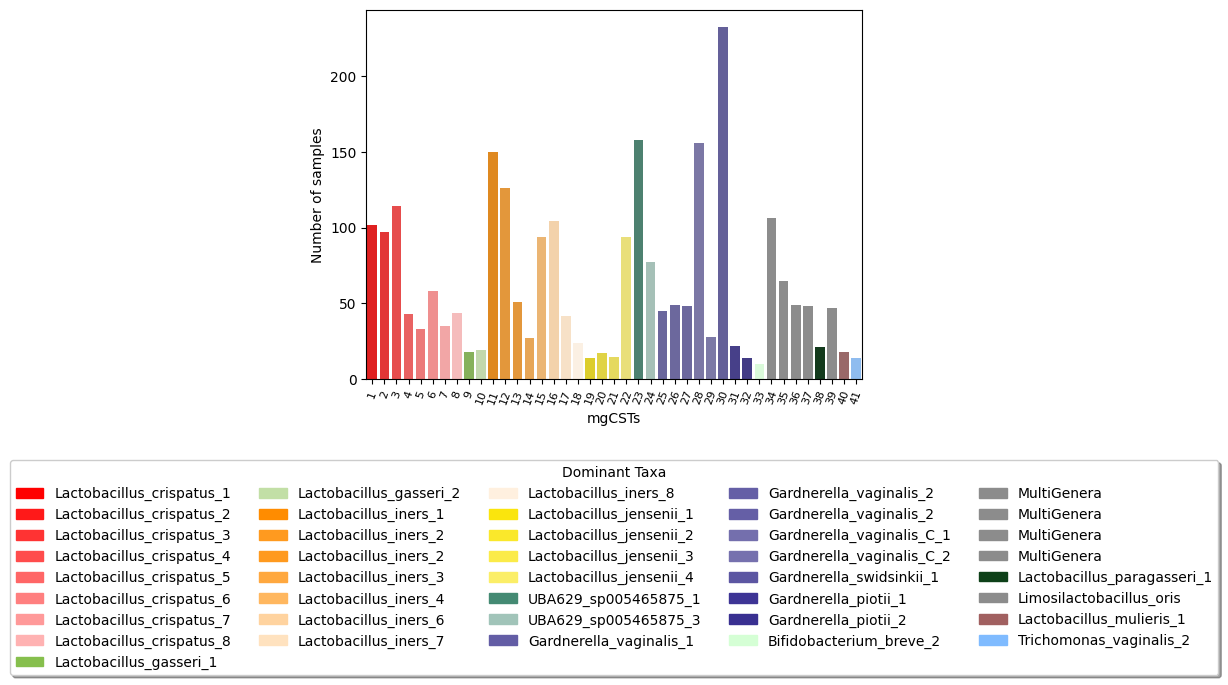

In [4]:
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

deepsplit = 4
mincluster = 10

data2 = pd.read_csv('Data/mgCST_sort_color.csv')
data2 = data2[(data2['deepSplit'] == deepsplit) & (data2['minClusterSize'] == mincluster)]
data2 = data2.reset_index(drop = True)

data = pd.read_csv('Data/mgCST_samples_color.csv')
data = data[(data['deepSplit'] == deepsplit) & (data['minClusterSize'] == mincluster)]
data = data.reset_index(drop = True)


count_sample = []
for element in data2['dtc'].values :
    count_sample.append(data.groupby(['dtc']).count()['sampleID'][element])
data2['count_sample'] = count_sample

mpatches.Patch(color = (1.0, 0.09803921568627451, 0.09803921568627451, 1.0), label = "test")
g = sns.barplot(x = 'mgCST', y = 'count_sample', data = data2 , legend = False, hue = 'mgCST', palette=list(data2['color_mgCST']))
fig1 = g.figure
plt.xlabel("mgCSTs")
plt.ylabel("Number of samples")
g.tick_params(axis='x', which='major', labelsize= 8, labelrotation=70)
# g.legend(title = 'mgCSTs',loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol = 5)
new_legend = data2['color_mgCST'].apply(lambda x : mcolors.to_rgba(x)).values

new_patch = []
for i,j in zip(new_legend, data2['domTaxa'].values) :
    new_patch.append(mpatches.Patch(color = i, label = j))

g.legend(handles=new_patch, title = 'Dominant Taxa',loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol = 5)
g.grid(False)

In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

path = "Data/pca_model.pkl"
path2 = "/Users/amaros/Desktop/mgss2/log_norm.pkl"

with open(path, 'rb') as file:
        model = pickle.load(file)

with open(path2, 'rb') as file:
        log_norm = pickle.load(file)       

mgcsts_samples_df = pd.read_csv("Data/mgCSTs.samples.df.csv")
mgCSTs_colors = pd.read_csv("Data/mgCST_sort_color.csv")


<Axes: xlabel='pc2', ylabel='pc3'>

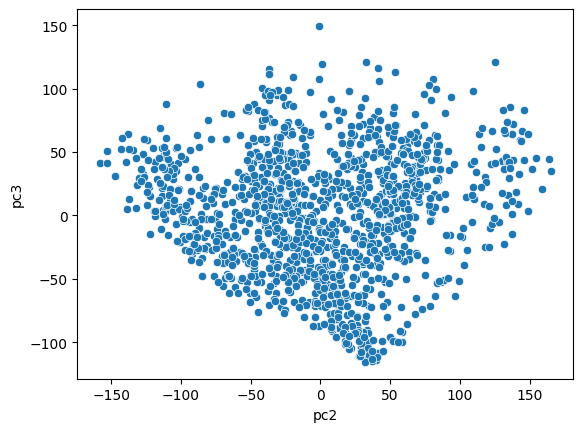

In [3]:
data_pca = pd.DataFrame(data = model[10][4][1]['principal_components'], columns=['pc1','pc2', 'pc3'])

sns.scatterplot(data=data_pca, x='pc2', y='pc3')

In [4]:
df = mgcsts_samples_df[(mgcsts_samples_df['minClusterSize'] == 10) & (mgcsts_samples_df['deepSplit'] == 4)].reset_index(drop = True)
mgcst_sort_color = mgCSTs_colors[(mgCSTs_colors['minClusterSize'] == 10) & (mgCSTs_colors['deepSplit'] == 4)]

In [5]:
# Filtering data to consider only groups of mgCSTs

groupA = [1,2,3,4,5,6,7,8]
groupB = [25,26,27,28,29,30]

df1 = df[df['mgCST'].isin(groupA)]
df2 = df[df['mgCST'].isin(groupB)]

In [6]:
sub_pca_data = pd.concat([df1, df2], axis = 0)
sub_pca_data = pd.merge(sub_pca_data, log_norm, on='sampleID', how='inner')
mgCSTs = sub_pca_data['mgCST']
sub_pca_data = sub_pca_data.drop(['dtc','sampleID','domTaxa','relabund','mgCST','minClusterSize','deepSplit'], axis = 1)
sub_pca_data

,lactate:phosphate,leucine:phosphate,glutamate:phosphate,isoleucine:phosphate,choline:phosphate,phenylalanine:phosphate,proline:phosphate,creatine:phosphate,alanine:phosphate,arginine:phosphate,...,paroxetine:ibuprofen acyl glucuronide,gabapentin:ibuprofen acyl glucuronide,gabapentin:paroxetine,glucuronide of C12H22O4 (2)*:sulforaphane-N-acetyl-cysteine,X-24736:sulforaphane-N-acetyl-cysteine,X-24736:glucuronide of C12H22O4 (2)*,venlafaxine:O-desmethylvenlafaxine,N-desmethyl tramadol:tramadol,O-desmethyltramadol:tramadol,O-desmethyltramadol:N-desmethyl tramadol
0,-0.242240,-0.536001,-0.605082,-0.700868,-1.310832,-0.763300,-0.944230,-0.968931,-1.280081,-2.020973,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.554704,2.067716,2.460572,1.909431,0.964342,1.803812,1.618200,2.100059,1.431418,1.275681,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.581627,-0.718200,-1.276009,-0.757387,-1.437074,-0.999416,-1.228487,-1.273537,-1.331133,-2.438149,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.569454,-1.289226,-1.239417,-1.429118,-1.097319,-1.350519,-1.408179,-1.101123,-1.453981,-1.859887,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.319335,-0.128058,-0.181613,-0.384263,-0.942346,-0.460932,-0.595556,-0.716068,-0.819147,-0.392551,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,1.948337,1.366629,1.649486,1.242911,0.960259,1.259814,1.274171,1.590410,0.952071,0.443224,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
532,-0.943423,-1.468219,-1.425140,-1.607864,-1.147847,-1.648994,-1.642591,-1.423489,-1.666795,-1.828370,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
533,-0.278598,-0.629774,-0.640843,-0.827612,-0.975944,-0.987198,-1.101884,-1.149093,-1.055022,-1.184798,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
534,-0.760222,-1.232691,-1.538754,-1.286107,-1.448818,-1.338567,-1.427375,-1.234919,-1.560545,-1.534532,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
principal_components = pca.fit_transform(sub_pca_data)
explained_variance = pca.explained_variance_
components_compo = pca.components_

In [11]:
components_compo[0]

array([-0.00777326, -0.00763299, -0.00943278, ..., -0.        ,
       -0.        , -0.        ])

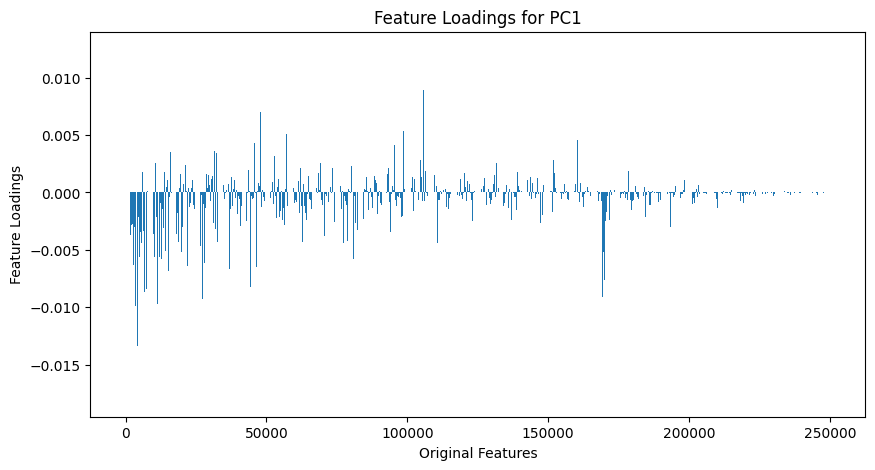

In [8]:
compo_pc1 = components_compo[0]
compo_pc2 = components_compo[1]
compo_pc3 = components_compo[2]

plt.figure(figsize=(10, 5))
plt.bar(range(len(compo_pc1)), compo_pc1)
plt.xlabel("Original Features")
plt.ylabel("Feature Loadings")
plt.title(f"Feature Loadings for PC1")
plt.show()

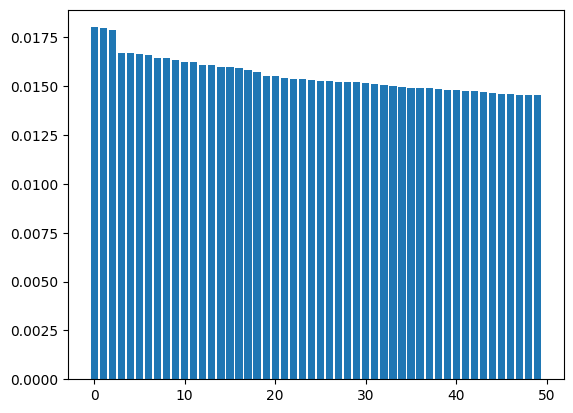

In [22]:
# Importance of features for PC1 - Top 50
import numpy as np

sorted_feature_indices = np.argsort(abs(compo_pc1))[::-1]

top = 50
top_indices = sorted_feature_indices[:top]

top_features = [abs(compo_pc1[i]) for i in top_indices]

plt.figure()
plt.bar(range(top), top_features)
plt.show()

In [23]:
print(log_norm.columns)

Index(['sampleID', 'lactate:phosphate', 'leucine:phosphate',
       'glutamate:phosphate', 'isoleucine:phosphate', 'choline:phosphate',
       'phenylalanine:phosphate', 'proline:phosphate', 'creatine:phosphate',
       'alanine:phosphate',
       ...
       'paroxetine:ibuprofen acyl glucuronide',
       'gabapentin:ibuprofen acyl glucuronide', 'gabapentin:paroxetine',
       'glucuronide of C12H22O4 (2)*:sulforaphane-N-acetyl-cysteine',
       'X-24736:sulforaphane-N-acetyl-cysteine',
       'X-24736:glucuronide of C12H22O4 (2)*',
       'venlafaxine:O-desmethylvenlafaxine', 'N-desmethyl tramadol:tramadol',
       'O-desmethyltramadol:tramadol',
       'O-desmethyltramadol:N-desmethyl tramadol'],
      dtype='object', length=250145)


In [96]:
import pandas as pd

df = pd.read_csv("Data/mgCSTs.samples.df.csv")
df['order'] = df['domTaxa'].apply(lambda x: x.rsplit("_", 1)[1] if x.count("_") >= 2 and len(x.rsplit("_", 1)) == 2 else 0)

markers = ['o', 's', 'D', '^', 'v', '>', '<', 'p', '*', 'h','x']
markers_df = []
for i in df['order'] :
    markers_df.append(markers[int(i)])
df['markers'] = markers_df
df = df.drop('order', axis = 1)

# df.to_csv("Data/mgCSTs.samples.df.csv", index=False)

df

,dtc,sampleID,domTaxa,relabund,mgCST,minClusterSize,deepSplit,markers
0,1,323752_MG,Gardnerella_vaginalis_2,0.641446,14,10,0,D
1,1,343163_MG,Gardnerella_vaginalis_C_1,0.181759,14,10,0,s
2,1,343165_MG,UBA629_sp005465875_3,0.130286,14,10,0,^
3,1,342484_MG,Gardnerella_vaginalis_C_3,0.154450,14,10,0,^
4,1,323760_MG,Trichomonas_vaginalis_2,0.193813,14,10,0,D
...,...,...,...,...,...,...,...,...
518235,17,MG_20_30764_05,Lactobacillus_crispatus_6,0.964308,5,50,4,<
518236,17,MG_20_35904_05,Lactobacillus_crispatus_6,0.776529,5,50,4,<
518237,17,MG_20_48099_05,Lactobacillus_crispatus_6,0.940431,5,50,4,<
518238,17,MG_20_02860_05,Lactobacillus_crispatus_6,0.728809,5,50,4,<


In [64]:
import pandas as pd
File_S6 = pd.read_excel("Data/File_S6_clean.xlsx")
new_IDs = pd.read_csv("Data/new_mgCSTs_sampleIDs.csv")
File_S6.head()

,UID,mapID,Source Study,BioProject,SID,Shannon,CST_Valencia,Age_cat,pH_cat,Nugent_cat,Race,mgCST,Coverage,Sym-Amsel-BV,Amsel-BV
0,ERR2238775,ERR2238775,Li et al.,PRJEB24147,ERR2238775,0.3349,III-A,NaN,NaN,NaN,Asian,12,243000,NaN,NaN
1,ERR2238777,ERR2238777,Li et al.,PRJEB24147,ERR2238777,0.2300,V,NaN,NaN,NaN,Asian,15,57700,NaN,NaN
2,ERR2244420,ERR2244420,Li et al.,PRJEB24147,ERR2244420,0.8791,IV-B,NaN,NaN,NaN,Asian,23,27600,NaN,NaN
3,ERR2244423,ERR2244423,Li et al.,PRJEB24147,ERR2244423,2.2721,IV-B,NaN,NaN,NaN,Asian,20,91900,NaN,NaN
4,ERR2244501,ERR2244501,Li et al.,PRJEB24147,ERR2244501,1.7009,IV-B,NaN,NaN,NaN,Asian,25,39900,NaN,NaN


In [65]:
new_IDs[new_IDs['sampleID'].isin(File_S6['mapID'])]

,sampleID
51,323884_MG
52,323886_MG
53,323887_MG
54,323888_MG
55,323890_MG
...,...
2356,MG_UAB065_W2D5_200718
2357,MG_UAB065_W3D3_200743
2358,MG_UAB065_W3D5_200750
2359,MG_UAB065_W3D7_200763


In [91]:
new_mgCST = pd.DataFrame({
    'mapID' : ["323884_MG","323887_MG","323886_MG","323890_MG","323888_MG","MG_UAB065_W2D5_200718","MG_UAB065_W3D3_200743","MG_UAB065_W3D5_200750","MG_UAB065_W3D7_200763","MG_UAB065_W4D2_200770"],
    'mgCST' : [1,2,3,4,5,1,2,6,3,4]
})

old_mgCST = File_S6[['mapID', 'mgCST']]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


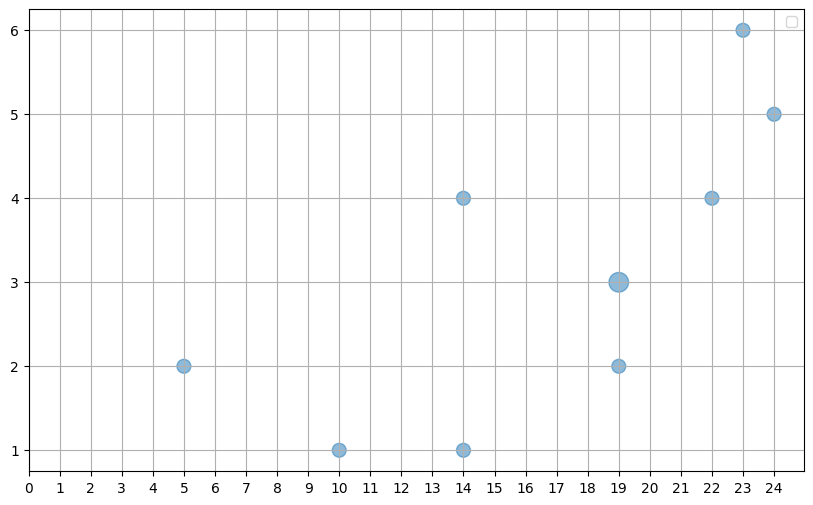

In [93]:
merged_df = old_mgCST.merge(new_mgCST, on='mapID', how='inner')

bubble_data = merged_df.groupby(['mgCST_x', 'mgCST_y']).size().reset_index(name='count')

import matplotlib.pyplot as plt
import numpy as np
# Create the bubble plot
plt.figure(figsize=(10, 6))
plt.scatter(bubble_data['mgCST_x'], bubble_data['mgCST_y'], s=bubble_data['count'] * 100, alpha=0.5)
plt.grid(True)
plt.xticks(np.arange(0,25))
plt.legend()

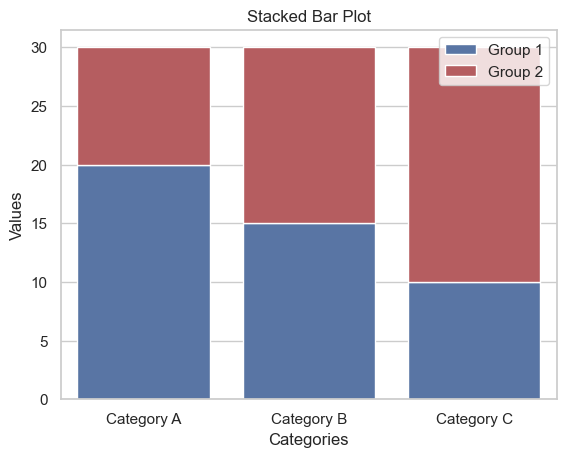

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data in a DataFrame
import pandas as pd

data = pd.DataFrame({
    'Categories': ['Category A', 'Category B', 'Category C'],
    'Group 1': [20, 15, 10],
    'Group 2': [10, 15, 20]
})

# Create a stacked bar plot using Seaborn
sns.set(style="whitegrid")
sns.barplot(x='Categories', y='Group 1', data=data, color='b', label='Group 1')
sns.barplot(x='Categories', y='Group 2', data=data, color='r', bottom=data['Group 1'], label='Group 2')

# Add labels and legend
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Stacked Bar Plot')
plt.legend()

# Show the plot
plt.show()


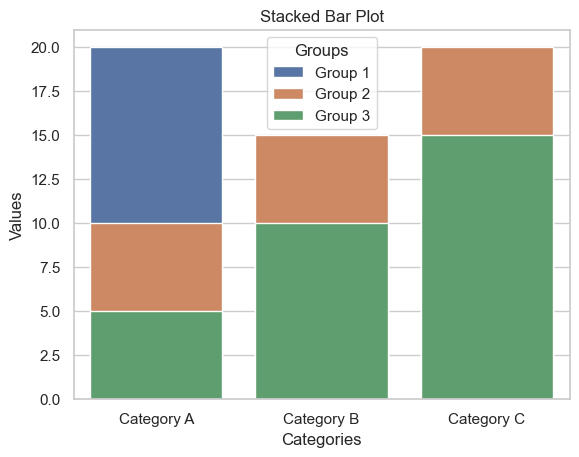

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data in a DataFrame
data = pd.DataFrame({
    'Categories': ['Category A', 'Category B', 'Category C'],
    'Group 1': [20, 15, 10],
    'Group 2': [10, 15, 20],
    'Group 3': [5, 10, 15]
})

# Get the list of column names (excluding the 'Categories' column)
column_names = data.columns[1:]

# Create a loop to stack multiple columns and create stacked bar plots
for column_name in column_names:
    sns.set(style="whitegrid")
    sns.barplot(x='Categories', y=column_name, data=data, label=column_name)
    
# Add labels and legend
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Stacked Bar Plot')
plt.legend(title='Groups')

# Show the plot
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data in a DataFrame
import pandas as pd

df3 = data.groupby(["Project","mgCST"]).size().reset_index().pivot(columns='Project', index = 'mgCST', values =0).fillna(0).reset_index()
proj_cols = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#d1ba36', '#a65628', '#f781bf', '#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e']
column_names = data.columns[1:]

# Create a stacked bar plot using Seaborn
sns.set(style="whitegrid")
for column_name in column_names:
    sns.set(style="whitegrid")
    sns.barplot(x='mgCST', y=column_name, data=df3, label=column_name)
plt.xlabel('mgCST')
plt.ylabel('Count')
plt.legend()

# Show the plot
plt.show()


In [107]:
import pandas as pd

df = pd.read_csv("Data/mgCSTs.samples.df.csv")

df = df.drop('markers', axis = 1)
